In [2]:
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')

In [4]:
ls ./train

Black-grass/  Common Chickweed/  Loose Silky-bent/   Shepherds Purse/
Charlock/     Common wheat/      Maize/              Small-flowered Cranesbill/
Cleavers/     Fat Hen/           Scentless Mayweed/  Sugar beet/


In [5]:
categories = ['Black-grass', 'Common Chickweed', 'Loose Silky-bent', 'Shepherds Purse', 'Charlock', 'Common wheat',
              'Maize', 'Small-flowered Cranesbill', 'Cleavers', 'Fat Hen', 'Scentless Mayweed', 'Sugar beet']
num_categories = len(categories)
num_categories

12

In [6]:
data_dir = '.'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [7]:
for category in categories:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

Black-grass 263 images
Common Chickweed 611 images
Loose Silky-bent 654 images
Shepherds Purse 231 images
Charlock 390 images
Common wheat 221 images
Maize 221 images
Small-flowered Cranesbill 496 images
Cleavers 287 images
Fat Hen 475 images
Scentless Mayweed 516 images
Sugar beet 385 images


In [8]:
from collections import defaultdict
from random import sample

image_paths_balanced = defaultdict(list)
samples_per_class = 200

for category in categories:
    image_dir = os.path.join(train_dir, category)
    lst = []
    for filepath in os.listdir(image_dir):
        if filepath.endswith('.png'):
            lst.append(os.path.join(image_dir, filepath))
        
    selected = sample(lst, samples_per_class)
    image_paths_balanced[category] = selected
    
image_paths_test = []
for filepath in os.listdir(test_dir):
    if filepath.endswith('.png'):
        image_paths_test.append(os.path.join(test_dir, filepath))    

In [9]:
print('Black-grass size for image_paths_balanced is', len(image_paths_balanced['Black-grass']))

Black-grass size for image_paths_balanced is 200


In [10]:
print('Total', len(image_paths_test), 'test subjects.')

Total 794 test subjects.


In [11]:
channels = 3

Class: Black-grass


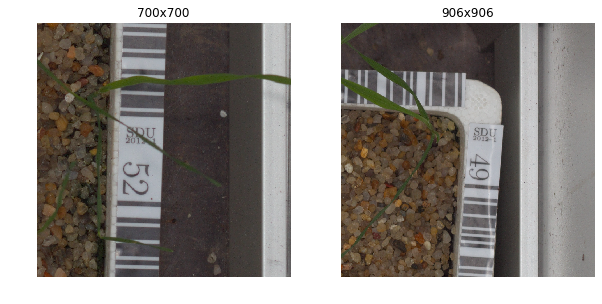

Class: Common Chickweed


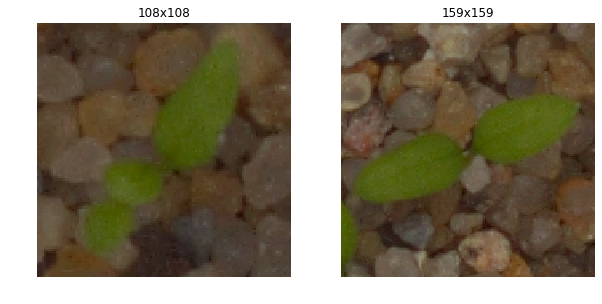

Class: Loose Silky-bent


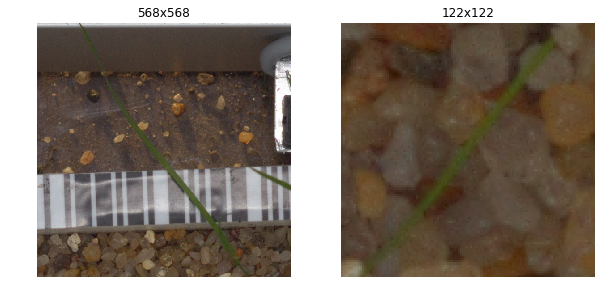

Class: Shepherds Purse


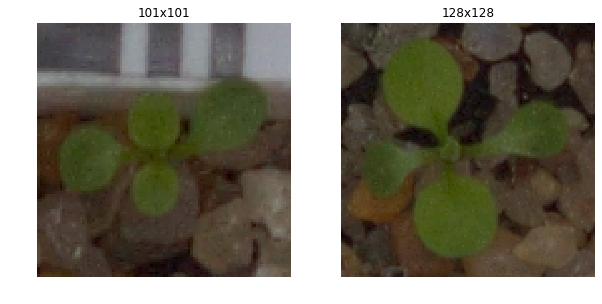

Class: Charlock


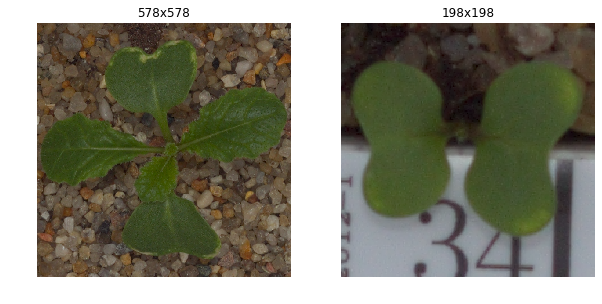

Class: Common wheat


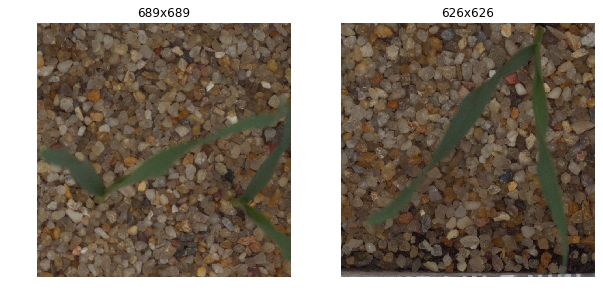

Class: Maize


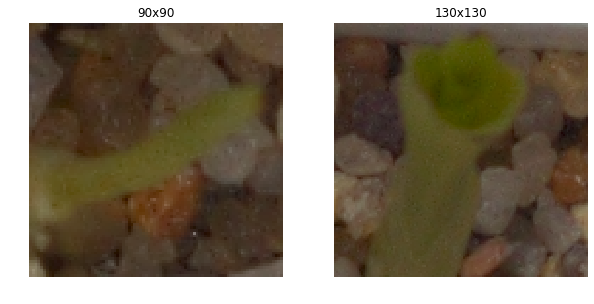

Class: Small-flowered Cranesbill


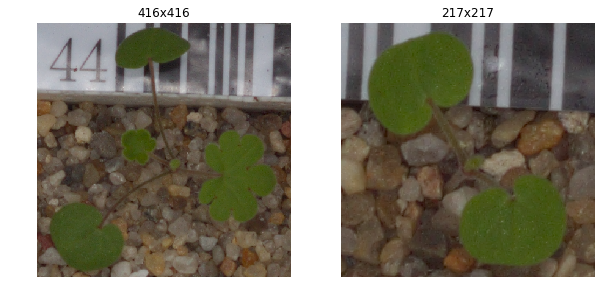

Class: Cleavers


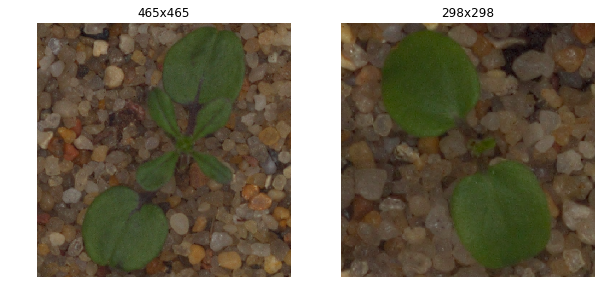

Class: Fat Hen


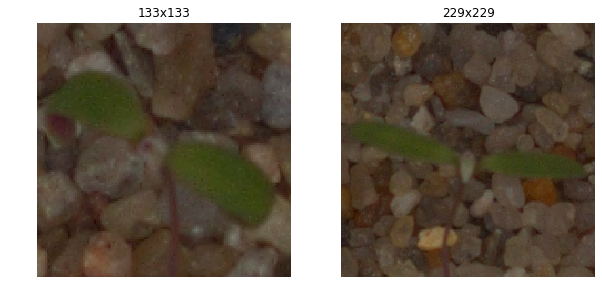

Class: Scentless Mayweed


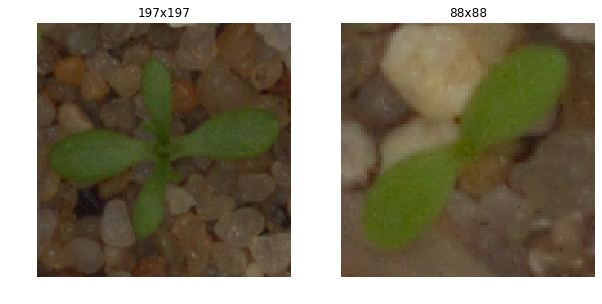

Class: Sugar beet


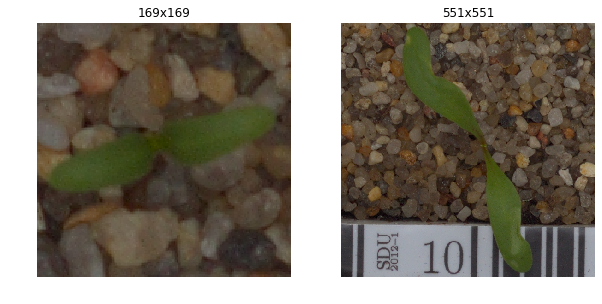

In [12]:
import matplotlib.image as mpimg

n_examples_per_class = 2

for category in categories:
    print('Class:', category)
    plt.figure(figsize=(10,5))
    for idx, example_image_path in enumerate(image_paths_balanced[category][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + idx + 1)
        plt.title('{}x{}'.format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis('off')
    plt.show()

In [13]:
# data resizing and augmentation
from scipy.misc import imresize

def crop_image(image, target_width = 32, target_height = 32, max_zoom = 0.2):
    '''Zooms and crops the image randomly for data augmentation'''
    # sync the ratio for height and width, find the largest bounding box for the original image 
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    
    # shrink the largest bounding box
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # select a random location on the image for this bounding box
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # crop
    image = image[y0:y1, x0:x1]
    
    # resize
    image = imresize(image, (target_width, target_height))
    
    # ensure the color ranges from 0.0 to 1.0 as 32-bit float
    return image.astype(np.float32) / 255

In [14]:
from skimage import exposure
import random

def augment(image):
    # flipping
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
    if np.random.rand() < 0.5:
        image = np.flipud(image)
    
    # brightness
    image = exposure.adjust_gamma(image, random.uniform(0.5, 1.5))
    return image

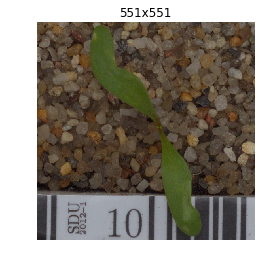

In [15]:
plt.figure(figsize=(6, 4))
plt.imshow(example_image)
plt.title('{}x{}'.format(example_image.shape[1], example_image.shape[0]))
plt.axis('off')
plt.show()

/home/capsule/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


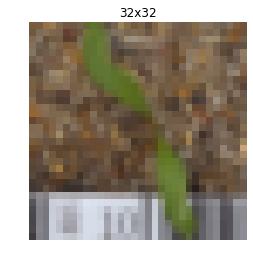

In [16]:
cropped_image = crop_image(example_image)

plt.figure(figsize=(6, 4))
plt.imshow(cropped_image)
plt.title('{}x{}'.format(cropped_image.shape[1], cropped_image.shape[0]))
plt.axis('off')
plt.show()

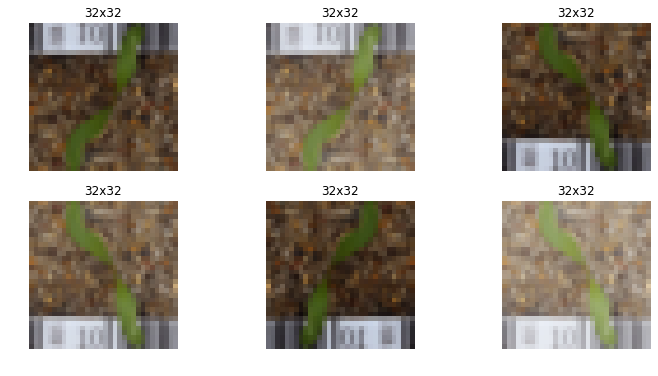

In [17]:
rows, cols = 2, 3
plt.figure(figsize=(12, 6))


for row in range(rows):
    for col in range(cols):
        a = augment(cropped_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title('{}x{}'.format(a.shape[1], a.shape[0]))
        plt.imshow(a)
        plt.axis('off')
plt.show()

In [18]:
sd_class_ids = {sd_class : idx for idx, sd_class in enumerate(sorted(categories))}
sd_class_ids

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [19]:
sd_class_categories = {idx : sd_class for idx, sd_class in enumerate(sorted(categories))}
sd_class_categories

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [20]:
sd_paths_and_classes_balanced = []
sd_test = []

for sd_class, paths in image_paths_balanced.items():
    for path in paths:
        sd_paths_and_classes_balanced.append((path, sd_class_ids[sd_class]))

In [21]:
def oversampling(paths_and_classes, multiple=1):
    X_batch, y_batch = [], []
    for i in range(multiple):
        for path, labels in paths_and_classes:
            image = mpimg.imread(path)[:, :, :channels]
            prepared_image = augment(crop_image(image))
            X_batch.append(prepared_image)
            y_batch.append(labels)
    X_batch = np.stack(X_batch)
    y_batch = np.array(y_batch, dtype=np.int32)
    return X_batch, y_batch

In [22]:
# approximately 1min/multiple
X_over, y_over = oversampling(sd_paths_and_classes_balanced, multiple=16)
X_over.shape

/home/capsule/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


(38400, 32, 32, 3)

In [23]:
def get_train_and_val(X, y, val_nums=1200):
    train_size = int(len(y) - val_nums)
    idx = np.random.permutation(len(y))
    X_train, y_train = X[idx[:train_size]], y[idx[:train_size]]
    X_val, y_val = X[idx[train_size:]], y[idx[train_size:]]
    return X_train, y_train, X_val, y_val

In [24]:
X_train, y_train, X_val, y_val = get_train_and_val(X_over, y_over)

In [25]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((37200, 32, 32, 3), (37200,), (1200, 32, 32, 3), (1200,))

In [26]:
X_test = []
for path in image_paths_test:
    image = mpimg.imread(path)[:, :, :channels]
    image = imresize(image, (32, 32))
    image = image.astype(np.float32) / 255
    X_test.append(image)

/home/capsule/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [27]:
X_test = np.stack(X_test)
X_test.shape

(794, 32, 32, 3)

In [28]:
def shuffle_batch(X, y, batch_size):
    idx = np.random.permutation(len(y))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [29]:
import tensorflow as tf

In [30]:
height = 32
width = 32
channels = 3
n_inputs = height * width
n_outputs = 12

In [31]:
tf.reset_default_graph()

with tf.name_scope('inputs'):   
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name='X')
    y = tf.placeholder(tf.int32, shape=[None], name='y')
    training = tf.placeholder_with_default(False, shape=[], name='training')

In [32]:
from functools import partial

he_init = tf.variance_scaling_initializer()

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.9)
my_dense_layer = partial(tf.layers.dense, kernel_initializer = he_init)

with tf.name_scope('convs_and_pools'):
    conv1 = tf.layers.conv2d(X, filters=8, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv1')
    bn1 = my_batch_norm_layer(conv1)
    conv2 = tf.layers.conv2d(bn1, filters=8, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv2')
    bn2 = my_batch_norm_layer(conv2)
    pool3 = tf.nn.max_pool(bn2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='pool3')
    
    conv4 = tf.layers.conv2d(pool3, filters=16, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv4')
    bn4 = my_batch_norm_layer(conv4)
    conv5 = tf.layers.conv2d(bn4, filters=16, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv5')
    bn5 = my_batch_norm_layer(conv5)
    pool6 = tf.nn.max_pool(bn5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='pool6')
    
    conv7 = tf.layers.conv2d(pool6, filters=32, kernel_size=3, strides=1, padding='SAME',
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv7')
    bn7 = my_batch_norm_layer(conv7)
    conv8 = tf.layers.conv2d(bn7, filters=32, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv8')
    bn8 = my_batch_norm_layer(conv8)
    conv9 = tf.layers.conv2d(bn8, filters=32, kernel_size=3, strides=1, padding='SAME', 
                             kernel_initializer=he_init, activation=tf.nn.relu, name='conv9')
    bn9 = my_batch_norm_layer(conv9)
    pool10 = tf.nn.max_pool(bn9, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='pool10')
    pool10_flat = tf.reshape(pool10, shape=[-1, 32 * 4 * 4])
    
with tf.name_scope('fc'):
    fc11 = my_dense_layer(pool10_flat, 128, name='fc11')
    bn11 = my_batch_norm_layer(tf.nn.relu(fc11))
    fc12 = my_dense_layer(bn11, 128, name='fc12')
    bn12 = my_batch_norm_layer(tf.nn.relu(fc12))
    
with tf.name_scope('output'):
    logits_before_bn = my_dense_layer(bn12, n_outputs, name='outputs')
    logits = my_batch_norm_layer(logits_before_bn)
    Y_proba = tf.nn.softmax(logits, name='Y_proba')

In [33]:
vars = tf.trainable_variables()
[v for v in vars if 'kernel' in v.name]

[<tf.Variable 'conv1/kernel:0' shape=(3, 3, 3, 8) dtype=float32_ref>,
 <tf.Variable 'conv2/kernel:0' shape=(3, 3, 8, 8) dtype=float32_ref>,
 <tf.Variable 'conv4/kernel:0' shape=(3, 3, 8, 16) dtype=float32_ref>,
 <tf.Variable 'conv5/kernel:0' shape=(3, 3, 16, 16) dtype=float32_ref>,
 <tf.Variable 'conv7/kernel:0' shape=(3, 3, 16, 32) dtype=float32_ref>,
 <tf.Variable 'conv8/kernel:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'conv9/kernel:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'fc11/kernel:0' shape=(512, 128) dtype=float32_ref>,
 <tf.Variable 'fc12/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'outputs/kernel:0' shape=(128, 12) dtype=float32_ref>]

In [34]:
scale = 0.002 # l2 regularization hyperparameter

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy")
    reg_losses = tf.add_n([tf.nn.l2_loss(v) for v in vars if 'kernel' in v.name])
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [35]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope('init_and_save'):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [36]:
n_epochs = 501
batch_size = 16

checkpoint_path = "./tmp/my_sd_model_1.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_sd_model_final_1"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists
        with open(checkpoint_epoch_path, 'rb') as f:
            start_epoch = int(f.read())
        print('Training was interrupted. Continuing as epoch', start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        iteration = 0
        print('Epoch', epoch, end='')
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            iteration += 1
            if iteration % 32 == 0: print('.', end='')
            sess.run([training_op, extra_update_ops], feed_dict={X: X_batch, y: y_batch, training: True})
        print()
        if epoch % 5 == 0:
            accuracy_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            loss_batch = loss.eval(feed_dict={X: X_batch, y: y_batch})
            accuracy_val = accuracy.eval(feed_dict={X: X_val, y:y_val})
            loss_val = loss.eval(feed_dict={X: X_val, y: y_val})
            print('Epoch', epoch,
                  ' Training accuracy: {:.2f}%'.format(accuracy_batch * 100),
                  ' Validation accuracy: {:.2f}%'.format(accuracy_val * 100),
                  ' Training loss: {:.4f}'.format(loss_batch),
                  ' Validation loss: {:.4f}'.format(loss_val),)
                  
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, 'wb') as f:
                f.write(b'%d' % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
                epochs_without_progress = 0
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print('Early Stopping')
                    break   

Epoch 0........................................................................
Epoch 0  Training accuracy: 81.25%  Validation accuracy: 80.33%  Training loss: 0.8627  Validation loss: 0.9076
Epoch 1........................................................................
Epoch 2........................................................................
Epoch 3........................................................................
Epoch 4........................................................................
Epoch 5........................................................................
Epoch 5  Training accuracy: 87.50%  Validation accuracy: 87.67%  Training loss: 0.5873  Validation loss: 0.6408
Epoch 6........................................................................
Epoch 7........................................................................
Epoch 8........................................................................
Epoch 9.................................................

Epoch 78........................................................................
Epoch 79........................................................................
Epoch 80........................................................................
Epoch 80  Training accuracy: 87.50%  Validation accuracy: 94.33%  Training loss: 0.4944  Validation loss: 0.3948
Epoch 81........................................................................
Epoch 82........................................................................
Epoch 83........................................................................
Epoch 84........................................................................
Epoch 85........................................................................
Epoch 85  Training accuracy: 81.25%  Validation accuracy: 94.17%  Training loss: 0.6610  Validation loss: 0.3968
Epoch 86........................................................................
Epoch 87.....................................

Epoch 156........................................................................
Epoch 157........................................................................
Epoch 158........................................................................
Epoch 159........................................................................
Epoch 160........................................................................
Epoch 160  Training accuracy: 100.00%  Validation accuracy: 93.17%  Training loss: 0.3498  Validation loss: 0.4243
Epoch 161........................................................................
Epoch 162........................................................................
Epoch 163........................................................................
Epoch 164........................................................................
Epoch 165........................................................................
Epoch 165  Training accuracy: 93.75%  Validation accuracy: 94.50%

In [37]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

inputs/X
inputs/y
inputs/training/input
inputs/training
conv1/kernel/Initializer/truncated_normal/shape
conv1/kernel/Initializer/truncated_normal/mean
conv1/kernel/Initializer/truncated_normal/stddev
conv1/kernel/Initializer/truncated_normal/TruncatedNormal
conv1/kernel/Initializer/truncated_normal/mul
conv1/kernel/Initializer/truncated_normal
conv1/kernel
conv1/kernel/Assign
conv1/kernel/read
conv1/bias/Initializer/zeros
conv1/bias
conv1/bias/Assign
conv1/bias/read
convs_and_pools/conv1/dilation_rate
convs_and_pools/conv1/Conv2D
convs_and_pools/conv1/BiasAdd
convs_and_pools/conv1/Relu
batch_normalization/gamma/Initializer/ones
batch_normalization/gamma
batch_normalization/gamma/Assign
batch_normalization/gamma/read
batch_normalization/beta/Initializer/zeros
batch_normalization/beta
batch_normalization/beta/Assign
batch_normalization/beta/read
batch_normalization/moving_mean/Initializer/zeros
batch_normalization/moving_mean
batch_normalization/moving_mean/Assign
batch_normalization/mov

In [38]:
tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('my_sd_model_final_1.meta')
    saver.restore(sess, final_model_path)
    X = tf.get_default_graph().get_tensor_by_name('inputs/X:0')
    Y_proba = tf.get_default_graph().get_tensor_by_name('output/Y_proba:0')
    prob = sess.run(Y_proba, feed_dict={X:X_test})

INFO:tensorflow:Restoring parameters from ./my_sd_model_final_1


In [39]:
y_pred = np.argmax(prob, axis=1)
len(y_pred)

794

In [40]:
sd_class_categories

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [41]:
image_paths_test[0], image_paths_test[0][7:]

('./test/90b595f12.png', '90b595f12.png')

In [42]:
import pandas as pd

In [43]:
res = pd.DataFrame(columns=['file', 'species'])

In [44]:
for i in range(len(y_pred)):
    res.loc[i, ['file']] = image_paths_test[i][7:]
    res.loc[i, ['species']] = sd_class_categories[y_pred[i]]

res

,file,species
0,90b595f12.png,Common Chickweed
1,5af1d74ee.png,Sugar beet
2,e1809cef2.png,Black-grass
3,8ece6efec.png,Scentless Mayweed
4,37c3108d6.png,Shepherds Purse
5,be2499cf4.png,Black-grass
6,3185294c8.png,Scentless Mayweed
7,01291174f.png,Fat Hen
8,8a30b2de3.png,Sugar beet
9,593896f83.png,Fat Hen


In [45]:
res[['file', 'species']].to_csv('submission.csv', index=False)